Yanyan-Wang的直接朋友: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca的直接朋友: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu的直接朋友: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
tyn1998的直接朋友: ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze0629', 'yvonney

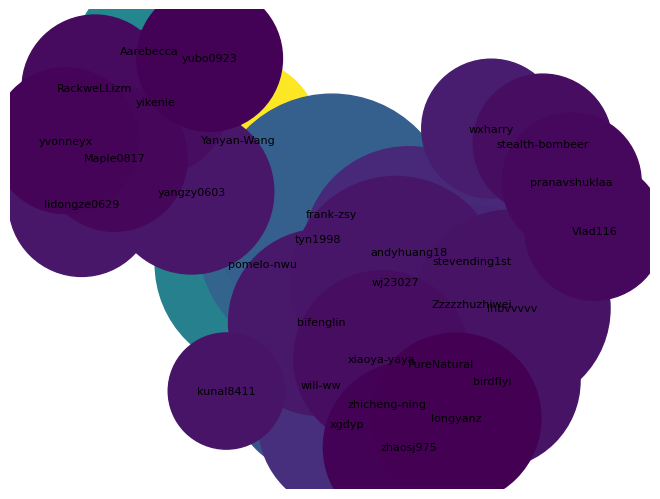

In [7]:
import json
import networkx as nx
import matplotlib.pyplot as plt


# 从json文件加载数据
with open('hw4_data.json', 'r') as file:
    data = json.load(file)

# 提取节点和边数据
nodes = data["nodes"]
edges = data["edges"]

# 构建社交关系网络（使用字典表示法）
social_network = {}
for node in nodes:
    social_network[node[0]] = {"influence_score": node[1], "friends": []}
for edge in edges:
    user1, user2, _ = edge
    social_network[user1]["friends"].append(user2)
    social_network[user2]["friends"].append(user1)

# 1. 社交网络构建与分析
# a. 已经通过上述代码使用字典表示法构建了社交关系网络

# b. 找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出
for user, info in social_network.items():
    print(f"{user}的直接朋友: {info['friends']}")

# 2. 统计与度中心性分析
# a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量
user_degrees = {}
for user, info in social_network.items():
    user_degrees[user] = len(info["friends"])
sorted_degrees = sorted(user_degrees.items(), key=lambda x: x[1], reverse=True)
print("度数最多的前5个用户及其朋友数量:")
for i in range(5):
    user, degree = sorted_degrees[i]
    print(f"{user}: {degree}个朋友")

# b. 通过影响力分数，找出影响力最高的前5个用户
sorted_influence = sorted(social_network.items(), key=lambda x: x[1]["influence_score"], reverse=True)
print("影响力最高的前5个用户:")
for i in range(5):
    user, _ = sorted_influence[i]
    print(user)

# c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（这里简单将两者相加作为综合影响力，可按需调整权重）
user_comprehensive_influence = {}
for user, info in social_network.items():
    influence_score = info["influence_score"]
    degree = len(info["friends"])
    user_comprehensive_influence[user] = influence_score + degree
sorted_comprehensive_influence = sorted(user_comprehensive_influence.items(), key=lambda x: x[1], reverse=True)
print("综合影响力最高的用户:")
for i in range(5):
    user, _ = sorted_comprehensive_influence[i]
    print(user)

# 3. 推荐新朋友
# a. 对于用户Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）
yanyan_friends = social_network["Yanyan-Wang"]["friends"]
friends_of_friends = []
for friend in yanyan_friends:
    friends_of_friends.extend(social_network[friend]["friends"])
# 去除重复以及本身已经是朋友的用户
friends_of_friends = list(set(friends_of_friends) - set(yanyan_friends) - {"Yanyan-Wang"})
common_friends_count = {}
for candidate in friends_of_friends:
    common_friends = set(social_network["Yanyan-Wang"]["friends"]) & set(social_network[candidate]["friends"])
    common_friends_count[candidate] = len(common_friends)
sorted_candidates = sorted(common_friends_count.items(), key=lambda x: x[1], reverse=True)
print("推荐给Yanyan-Wang的新朋友（基于共同朋友数量）:")
for candidate, count in sorted_candidates:
    print(f"{candidate}: 共同朋友数量为 {count}")

# b. 考虑用户之间的连接强度，找出与Yanyan-Wang连接强度最高的5个用户（无论是否已经是直接朋友）
connection_strengths = {}
for edge in edges:
    if "Yanyan-Wang" in edge:
        user, _, strength = edge
        connection_strengths[user] = strength
sorted_strengths = sorted(connection_strengths.items(), key=lambda x: x[1], reverse=True)
print("与Yanyan-Wang连接强度最高的5个用户:")
for i in range(5):
    user, strength = sorted_strengths[i]
    print(f"{user}: 连接强度为 {strength}")

# 4. 网络图的可视化
# a. 使用networkx和matplotlib绘制用户关系网络图，展示关键用户和他们的连接情况
G = nx.Graph()
for node in nodes:
    G.add_node(node[0], influence=node[1])
for edge in edges:
    G.add_edge(edge[0], edge[1])
# 根据影响力得分设置节点颜色，根据度数设置节点大小
node_colors = [G.nodes[node]['influence'] for node in G.nodes]
node_sizes = [1000 * len(social_network[node]['friends']) for node in G.nodes]
nx.draw(G, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=8)
plt.show()